# Encounter frequencies

$\omega_e = \omega - k U \cos( \beta )$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Snoopy import Spectral as sp
from Snoopy import TimeDomain as td
from Snoopy import PyplotTools as dplt

## Plots related to  $\omega_e$ and  $\omega$

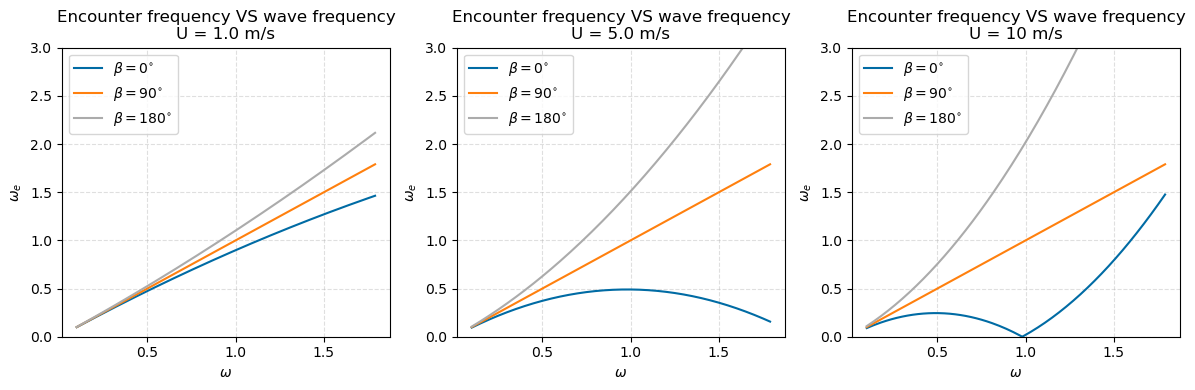

In [2]:
w = np.arange(0.1 , 1.8, 0.01)

fig, ax = plt.subplots( ncols = 3, figsize = (12,4) )
for i, speed in enumerate([ 1., 5., 10]):
    ax[i].plot( w , np.abs(sp.w2we( w = w , b = np.deg2rad(0.) , speed = speed )) , label = f"$\\beta = 0^{{\\circ}}$"  )
    ax[i].plot( w , np.abs(sp.w2we( w = w , b = np.deg2rad(90.) , speed = speed )) , label = f"$\\beta = 90^{{\\circ}}$"  )
    ax[i].plot( w , np.abs(sp.w2we( w = w , b = np.deg2rad(180.) , speed = speed )) , label = f"$\\beta = 180^{{\\circ}}$"  )
    ax[i].set(xlabel = r"$\omega$", ylabel = r"$\omega_e$", ylim = [0.0 , 3.0], title = f"Encounter frequency VS wave frequency\nU = {speed:} m/s" )
    ax[i].legend()
plt.tight_layout()

ISO contour of $\omega_e$ can be retrieved with sp.ContourWeSpeed (space $\omega , \beta$) or sp.ContourWeW (space $speed , \beta$)

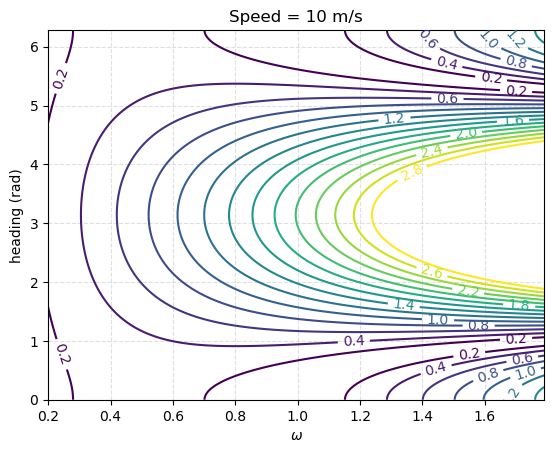

In [3]:
contour_gen = sp.ContourWeSpeed( speed = 10.0 )

# Get numerical value of the iso contour, without plotting
c = contour_gen(0.5)

# Use matplotib contour to just plot. 
fig, ax = plt.subplots()
CS = contour_gen.contour( levels = np.arange(0.2, 3.0 , 0.2), ax=ax )
ax.clabel(CS, inline=1, fontsize=10)
ax.set(xlabel = r"$\omega$" , ylabel = "heading (rad)", title = "Speed = 10 m/s");

## Conversion

Converting from $\omega$ to $\omega_e$ is straightforward:

In [4]:
we = sp.w2we( w = np.arange(0.2, 1.8, 0.1) , b= np.pi , speed = 10  )
print (f"{we:}")

[0.24077472 0.39174312 0.56309888 0.754842   0.96697248 1.19949032
 1.45239551 1.72568807 2.01936799 2.33343527 2.66788991 3.02273191
 3.39796126 3.79357798 4.20958206 4.6459735 ]


Converting from $\omega_e$ to $\omega$ is ok in head sea...

In [5]:
w = sp.we2w( we = we , b= np.pi , speed = 10  )
print (f"{w:}")

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7]


...but ambiguous in case of following sea :

In [6]:
w = 0.6
we = sp.w2we( w = w , b= 0.0 , speed = 10  )
w_back = sp.we2w( we = np.abs(we) , b= 0.0 , speed = 10  )

print( f"w = {w:.3f} =>  we = {we:.3f}")
print (f"w that corresponds to we= {we:.3f} : {w_back:}")

w = 0.600 =>  we = 0.233
w that corresponds to we= 0.233 : [0.381      0.6        1.17547463]


## Dimensionless plots

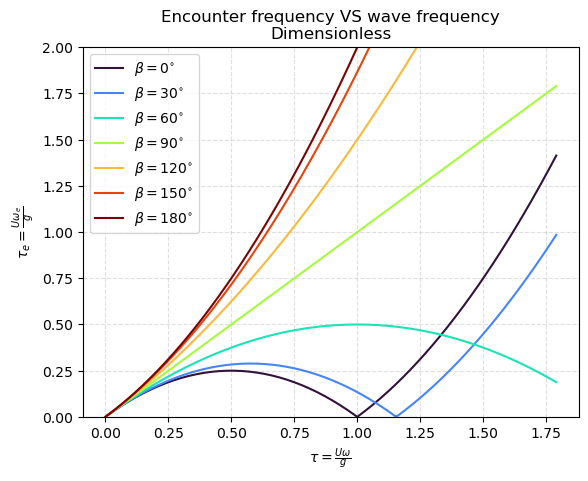

In [7]:
tau = np.arange(0.0 , 1.8, 0.01)

speed = 5.
w = tau * 9.81 / speed
c = dplt.getColorMappable(0.0 , 180., cmap ="turbo")
fig, ax = plt.subplots()
for heading in [0., 30, 60 , 90., 120., 150., 180.] :
    ax.plot( tau , speed * np.abs(sp.w2we( w = w , b = np.deg2rad(heading) , speed = speed )) / 9.81 , label = f"$\\beta = {heading:.0f}^{{\\circ}}$" , color = c.to_rgba(heading) )
    ax.set(xlabel = r"$\tau = \frac{U \omega}{g}$", ylabel = r"$\tau_e = \frac{U \omega_e } {g}$", ylim = [0 , 2.0], title = "Encounter frequency VS wave frequency\nDimensionless" );
ax.legend();

## Case of a current

The case of a vessel in current can be shown to be equivalent to the one of a vessel moving at a forward speed. In the current case, if the wave frequency is given considering an earth fixed position, it plays the role of the encounter frequency in the problem of forward speed. If wave and current are going in opposite directions, there is then, theoretically, an ambiguity in defining the problem (several wavelengths can correspond to the same encounter frequency). 

However, with typical current speed, there is, in practice, no ambiguity, as shown below.

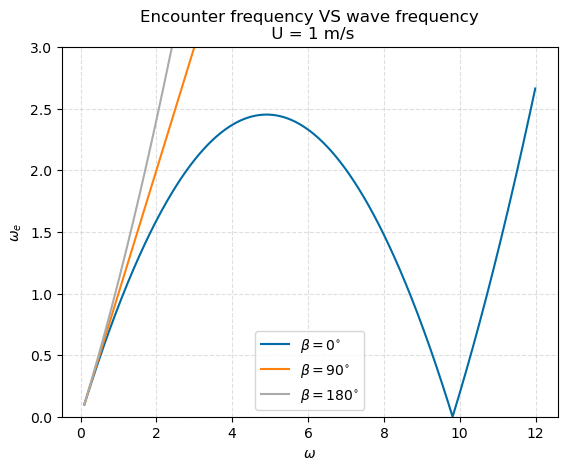

In [8]:
current_speed = 1.

w = np.arange(0.1 , 12.0, 0.01)
fig, ax = plt.subplots()
ax.plot( w , np.abs(sp.w2we( w = w , b = np.deg2rad(0.) , speed = current_speed )) , label = f"$\\beta = 0^{{\\circ}}$"  )
ax.plot( w , np.abs(sp.w2we( w = w , b = np.deg2rad(90.) , speed = current_speed )) , label = f"$\\beta = 90^{{\\circ}}$"  )
ax.plot( w , np.abs(sp.w2we( w = w , b = np.deg2rad(180.) , speed = current_speed )) , label = f"$\\beta = 180^{{\\circ}}$"  )
ax.set(xlabel = r"$\omega$", ylabel = r"$\omega_e$", ylim = [0.0 , 3.0], title = "Encounter frequency VS wave frequency\n U = 1 m/s" )
ax.legend();

Taking $\omega_e = 0.5 rad/s$ and a speed of 2 knots, there are three theoretical solutions. However, the two largest are not physically realistic.

In [9]:
sp.we2w( 0.5 , speed = current_speed, b=0.0 )

array([ 0.52846884,  9.28153116, 10.28682358])

In practice, the function `we2w` can thus accept a optional argument `w_guess` indicating which frequeny should be used (the closest to w_guess will be taken).

In [10]:
sp.we2w( 0.5 , speed = current_speed, b=0., return_type = "float", w_guess = 0.0 )

0.5284688393660444

### Converting wave spectrum

As most of the spectral analysis tools are designed to work with the forward-speed case and not so much with current speed, there is a practical need to convert the current problem to a forward-speed problem. This can be done simply by converting the wave spectrum given in the fixed ship reference $S(\omega_e)$, to a wave spectrum given in frame that moves with the current $S(\omega)$.


$S(\omega) = \frac{ S(\omega_e) } { \frac{d\omega}{d\omega_e}(\omega_e) }$

In [11]:
current_speed = 2.0
heading = np.pi
tp = 10.0

In [12]:
swe = sp.Jonswap(1.0 , tp, 1.5, heading)

In [13]:
def we2w_diff( we , heading , speed, depth = -1 , w_guess = 0.5, eps = 0.0001  ):
    return (sp.we2w( we + eps, heading, speed, depth = depth, return_type="float",w_guess=w_guess ) - sp.we2w( we, heading, speed, depth = depth, return_type="float",w_guess=w_guess   )) / eps

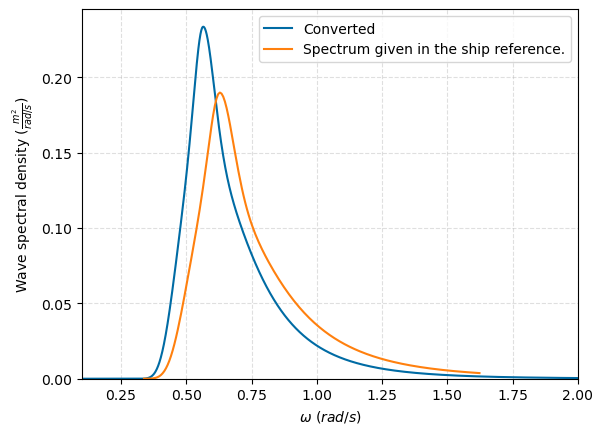

In [14]:
def compute_spec_with_current( swe, w , speed, depth = -1 ):
    we = sp.w2we( w , swe.heading, speed, depth = -1 )
    return swe.compute(we) / we2w_diff(we, swe.heading, speed, depth, eps = 0.0001)

w = np.arange(0.1 , 4.0, 0.001)
fig, ax = plt.subplots()
ax.plot( w,  compute_spec_with_current(swe, w, current_speed) , label ="Converted")
swe.plot(ax=ax, label = "Spectrum given in the ship reference.")
ax.set(xlim = [0.1, 2.0])
ax.legend();


The converted spectrum is strictky speaking not a Jonswap spectrum, and might thus not used in some software. As a alternative, an practical approximation could be to use Jonswap spectrum, with a converted peak period. As the below graphs shows, this can be considered accepetable.

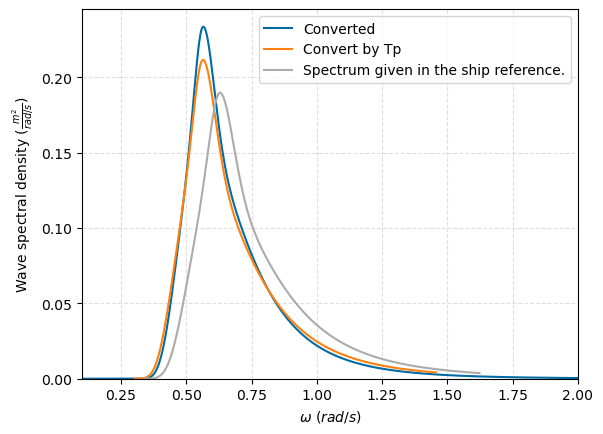

In [15]:
tp_converted = 2*np.pi / sp.we2w( 2*np.pi/tp, b = heading, speed = current_speed )
sw_simple = sp.Jonswap(1.0 , tp = tp_converted, gamma = 1.5, heading = heading)

fig, ax = plt.subplots()
ax.plot( w,  compute_spec_with_current(swe, w, current_speed) , label ="Converted")
sw_simple.plot(ax=ax, label = 'Convert by Tp')
swe.plot(ax=ax, label = "Spectrum given in the ship reference.")
ax.set(xlim = [0.1, 2.0])
ax.legend();